CMPINF0011 Final Group Project
Find the best neighborhood in Pittsburgh

SUBMETRIC PARKS


Nicholas Hoffman


•	Introduction: 
Hello! We are team – Named Last Minute and we believe that we have found the best neighborhood in Pittsburgh. We eventually chose the best infrastructure as our metric for what makes a neighborhood the greatest in our city. Initially we thought of doing healthiness, then considered something to do with the cost of living, but finally settled on infrastructure, because a lot of different things can be considered infrastructure.


•	The Metric: 

Infrastructure in this case means the what has been built and what is around for your edification. 

•	Parks: 

For my Sub-metric I chose I chose the one of the most important pieces of infrastructure to me since I like to hike, parks. Parks are great stress relief, they remove yourself from the hustle and bustle of city life, and are great places to have social gatherings, as well as making the environment way nicer with greenery and fresh air. 
Data Set: I am using the data set simply called Pittsburgh Parks https://data.wprdc.org/datastore/dump/bb57d0a7-e8ee-4218-8906-0dedc903038c 

The more park the merrier (especially when it comes to hiking), so the feature I honed in on was the overall area in square feet of parks in each neighborhood. The parks were not separated into neighborhoods, however, but 16 sectors, so I had to map those to specific neighborhoods. I eliminated bottom 6 sectors immediately (to get a clean top 10). I did not divide the parks in any way, I know some parks are in multiple neighborhoods but they fell in the one they were in the most. Also, some things are similar to parks but are not in the data base, like the Allegheny Cemetery.

The neighborhood with the most square footage of parks in it was **Squirrel Hill** by a landslide. Which is not surprising if you consider that two of the largest Parks, Schenley and Frick Park were considered in Squirrel Hil. The next couple of neighborhoods were also buoyed by singular massive parks, as number 2 was Hays, with Hays Woods, and 3 was Highland Park, with Highland Park. Mount Washington and Beechview had more spread-out smaller parks at 4 and 5.  

In [2]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

I grabbed the park data but it has way more information that I need, I just care about how the squarefootage of park per sector

In [4]:
pgh_parks_data = pd.read_csv("https://data.wprdc.org/datastore/dump/bb57d0a7-e8ee-4218-8906-0dedc903038c")#, index_col = "sector")
pgh_parks_data.head(5)



,_id,objectid_1,objectid,acreage,sqft,final_cat,type,sector,origpkname,updatepknm,...,globalid,created_user,created_date,last_edited_user,last_edited_date,maintenanceresponsibility,dpw_ac,globalid_1,shape_area,shape_length
0,31021,1202,36.0,0.959034,41775.367101,Neighborhood Park,NP,15.0,Cliffside Parklet,August Wilson Park,...,764d9a2f-719c-49c2-b747-8f276149bf04,pgh.dcp.allisot,2023-08-02T14:10:28.845000+00:00,pgh.dcp.allisot,2023-08-02T14:10:28.845000+00:00,Parks - Schenley,0.959034,f781af9c-9ec2-4b5e-b5c5-9cc21608635c,6709.199219,390.397012
1,31022,1203,198.0,2.060117,89738.347520,Neighborhood Park,NP,2.0,Young Field,Young Field Park,...,9b969f67-1f2e-4f4b-8556-e4ac49ca208e,pgh.dcp.allisot,2023-08-02T14:10:28.845000+00:00,pgh.dcp.allisot,2023-08-02T14:10:28.845000+00:00,Parks - Riverview,2.060117,659c4c55-50fc-4883-8606-76f029fcca47,14423.417969,511.980181
2,31023,1204,158.0,0.468682,20415.724875,Neighborhood Park,NP,8.0,Revenue Park,Roland Lockridge Community Park,...,44bbbdf5-c2db-451c-b880-9251b8211455,pgh.dcp.allisot,2023-08-02T14:10:28.845000+00:00,pgh.dcp.allisot,2023-08-02T14:10:28.845000+00:00,Parks - Frick,0.468682,04e61cab-bea6-47dd-964a-0723197726cf,3273.722656,236.488235
3,31024,1205,72.0,1.955430,85178.182207,Neighborhood Park,NP,12.0,Friendship Park,Friendship Park,...,f95cbafc-dcd8-493f-8b98-89745c6434ca,pgh.dcp.allisot,2023-08-02T14:10:28.845000+00:00,pgh.dcp.allisot,2023-08-02T14:10:28.845000+00:00,Parks - Highland,1.955430,22563a68-61d3-46f3-9d5c-4558ee12be1f,13686.265625,760.982871
4,31025,1206,87.0,5.108070,222506.623799,Neighborhood Park,NP,12.0,Heths Playground,Heth's Park,...,a6a4ac92-5a00-4af5-9f11-716e51079fea,pgh.dcp.allisot,2023-08-02T14:10:28.845000+00:00,pgh.dcp.allisot,2023-08-02T14:10:28.845000+00:00,Parks - Highland,5.108070,b5b34833-e1d5-430f-afcc-40a1670d545d,35767.898438,875.156997


So I group by the sector as an index and the sum of the sqft in each sector

In [5]:

sector_sqft = pgh_parks_data.groupby("sector")["sqft"].sum().sort_values(ascending=False)
sector_sqft


sector
10.0    4.703252e+07
8.0     2.885870e+07
12.0    1.836450e+07
6.0     1.522724e+07
5.0     1.393727e+07
2.0     1.358688e+07
9.0     7.190135e+06
4.0     5.155440e+06
7.0     4.458995e+06
3.0     3.309189e+06
15.0    3.213623e+06
13.0    3.153867e+06
16.0    2.516328e+06
11.0    1.722185e+06
1.0     1.390821e+06
14.0    2.849410e+05
Name: sqft, dtype: float64

### Making the Data Nicer
Thats a lot easier to deal with, but it is still hard to parse. 
First, I cut out the top 10 because we do not care about the lowest 6, then I had to find out what the sectors meant.
Every sector is roughly a neighborhood, and so I went on google maps satellite view as well as looking at the map that I gathered the original data for the parks from. I then filtered by sector to find all the parks in a sector and matched it to it’s neighborhood. Then I replaced the sector numbers with the neighborhood names and made the data more readable by converting the large numbers of square feet into millions of square feet.

In [6]:
#then get the top 10 only
top_10 = sector_sqft.head(10)
#then add the name of the neighborhoods associated with the sector
names = ["Squirrel Hill", "Hays", "Highland Park", "Mount Washington", "Beechview", "Perry North", "Hazelwood", "Sheriden", "South Side", "Allegheny Center"]
top_10.index = names 
#then make the data more readable but making it be in the millions of squarefeet
top_10 = top_10/1_000_000
top_10

Squirrel Hill       47.032516
Hays                28.858705
Highland Park       18.364503
Mount Washington    15.227244
Beechview           13.937272
Perry North         13.586878
Hazelwood            7.190135
Sheriden             5.155440
South Side           4.458995
Allegheny Center     3.309189
Name: sqft, dtype: float64

Now I just made it into  a bar graph.

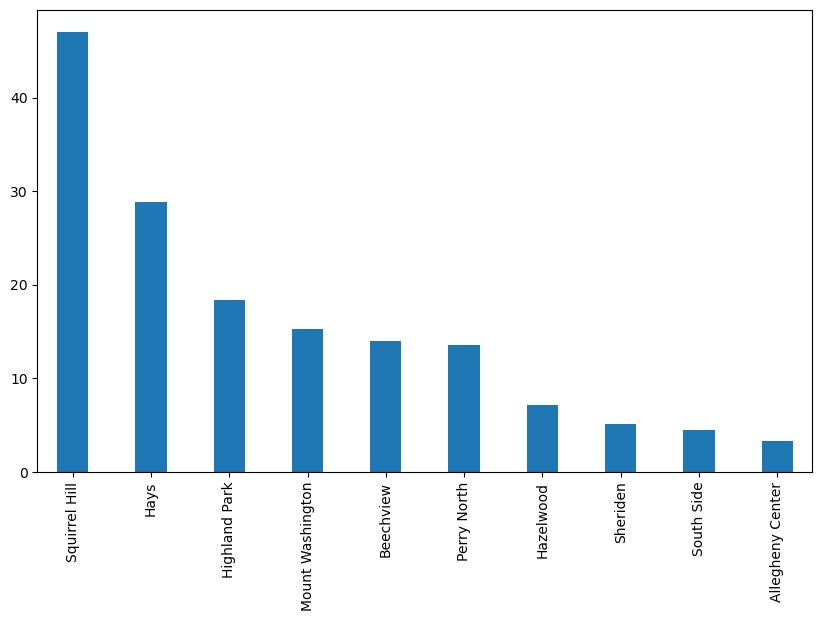

In [8]:
top_10.plot(kind ="bar", width = 0.4, figsize=(10, 6))
plt.show()

Conclusion: The Best Neighborhood

I was surprised by Hays winning since I have never been they and don't know much about it, but personally my favorite neighborhood matches up 1 to 1 with my Sub-metric, Squirrel Hill has the best parks and has some really good food, so it takes the cake for me.
